In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Datasets\\microsoft\\MSFT.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400
9082,2022-03-24,299.140015,304.200012,298.320007,304.100006,304.100006,24446900


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
def plot_stock(stock,color,date=df['Date'],df=df):
    fig = plt.figure(figsize=(20,8))
    sns.lineplot(y=df[stock],x=date,color=color)
    plt.title(f"Stock price change for |{stock}")
    plt.show()

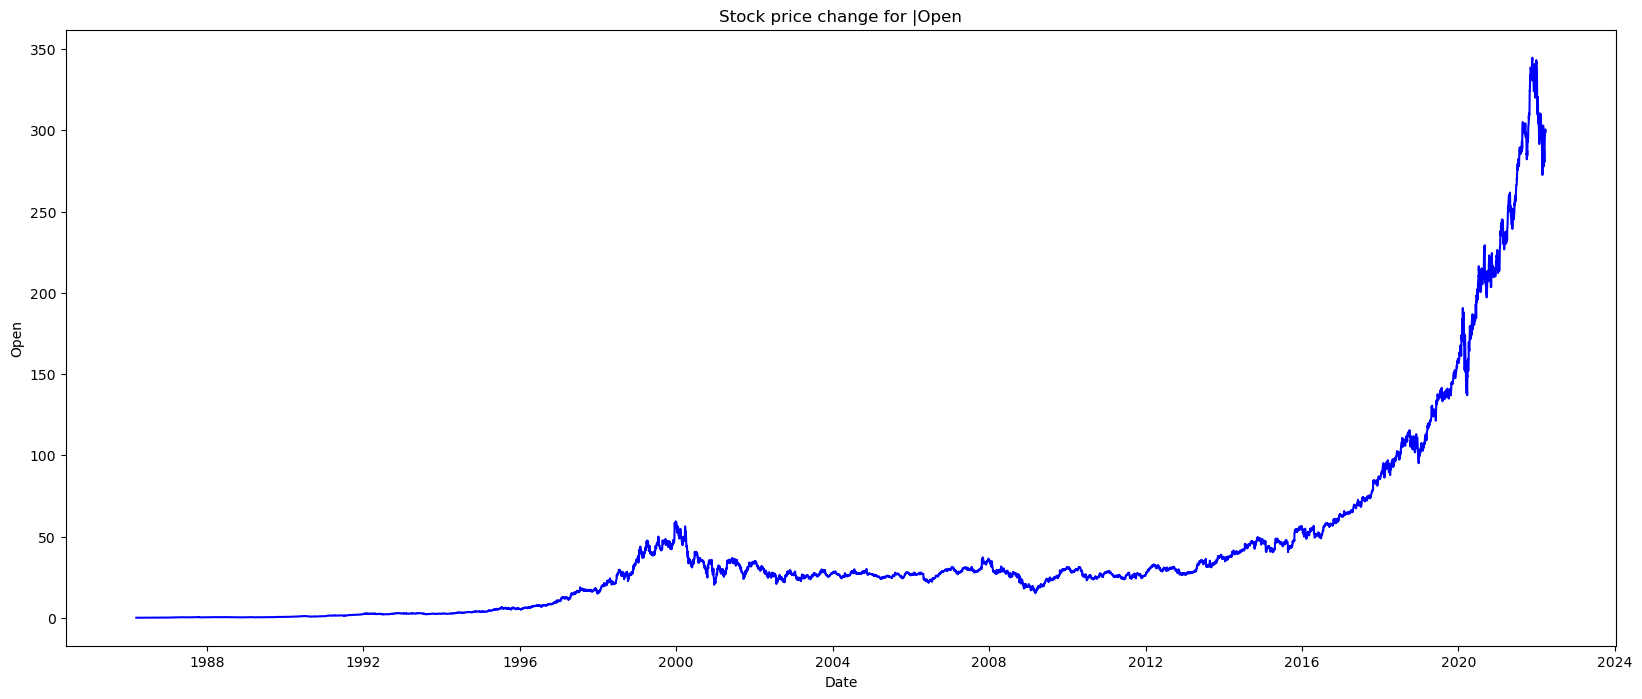

In [8]:
plot_stock('Open','blue')

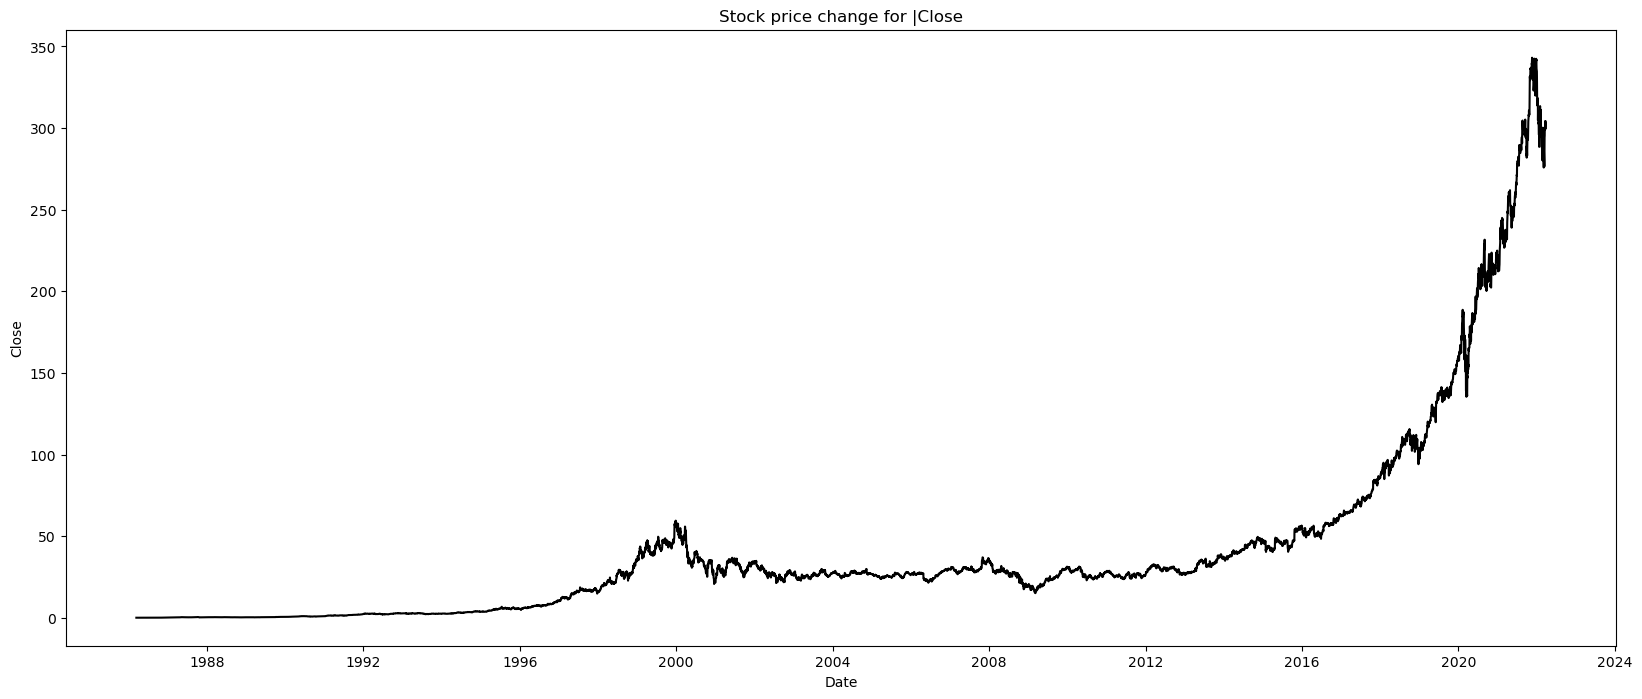

In [9]:
plot_stock('Close','black')

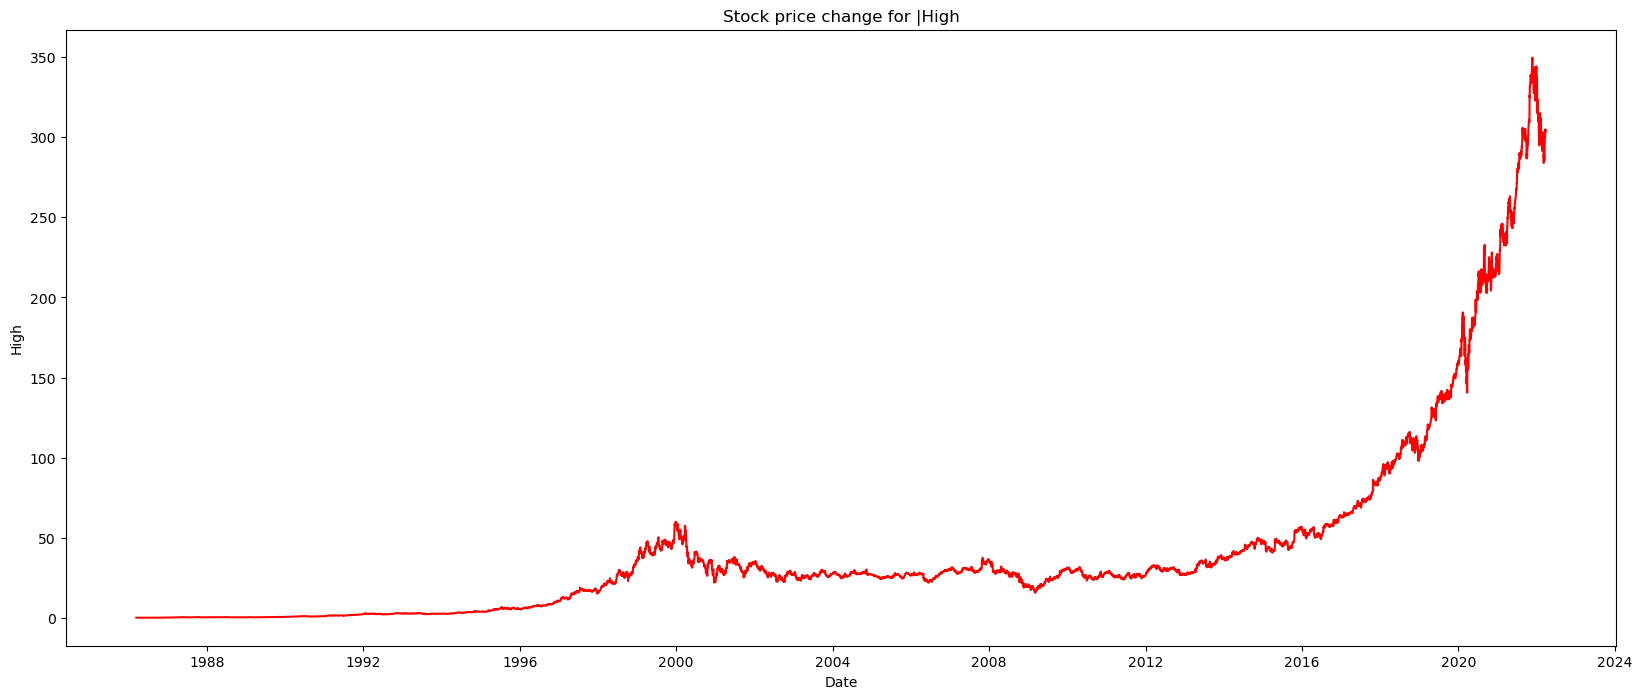

In [10]:
plot_stock('High','red')

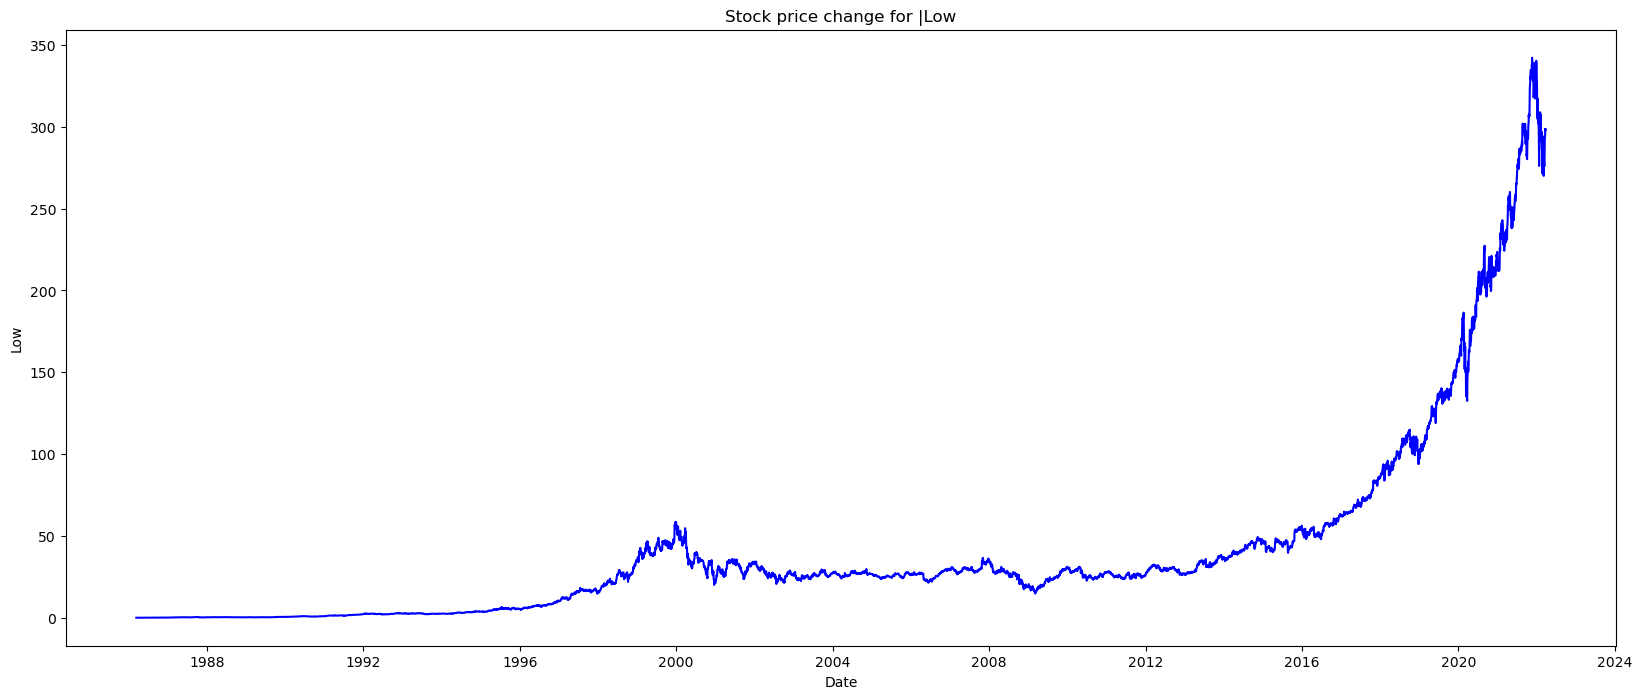

In [11]:
plot_stock('Low','blue')

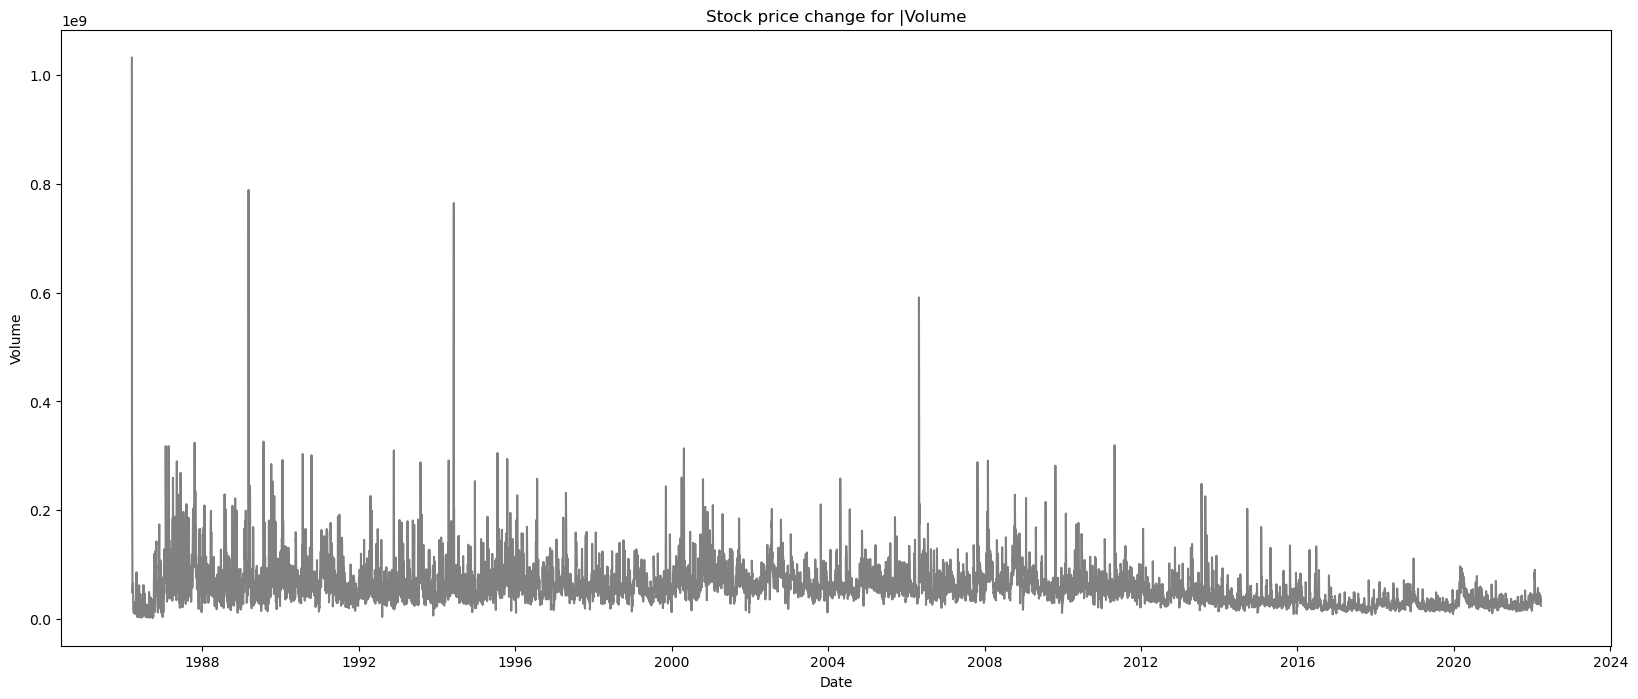

In [12]:
plot_stock('Volume','grey')

In [13]:
df['Close'].var()

3565.829486657023

In [14]:
df['Close'].mean()

41.33562759165465

In [15]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999934,0.999924,0.999854,0.997546,-0.302497
High,0.999934,1.000000,0.999891,0.999921,0.997545,-0.300973
Low,0.999924,0.999891,1.000000,0.999925,0.997675,-0.304221
Close,0.999854,0.999921,0.999925,1.000000,0.997691,-0.302686
Adj Close,0.997546,0.997545,0.997675,0.997691,1.000000,-0.304574
Volume,-0.302497,-0.300973,-0.304221,-0.302686,-0.304574,1.000000


In [16]:
df.drop(['Volume'],axis=1,inplace=True)

In [17]:
df.corr()

,Open,High,Low,Close,Adj Close
Open,1.000000,0.999934,0.999924,0.999854,0.997546
High,0.999934,1.000000,0.999891,0.999921,0.997545
Low,0.999924,0.999891,1.000000,0.999925,0.997675
Close,0.999854,0.999921,0.999925,1.000000,0.997691
Adj Close,0.997546,0.997545,0.997675,0.997691,1.000000


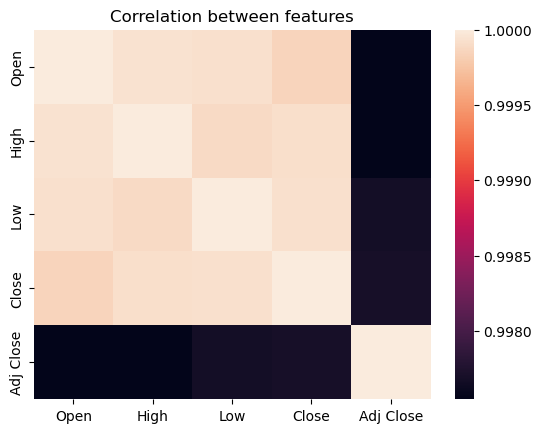

In [18]:
sns.heatmap(df.corr())
plt.title('Correlation between features')
plt.show()

In [19]:
def scatter(a,b,df=df):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x=a,y=b,data=df)
    plt.title(f"scatterplot for {a}vs {b}")

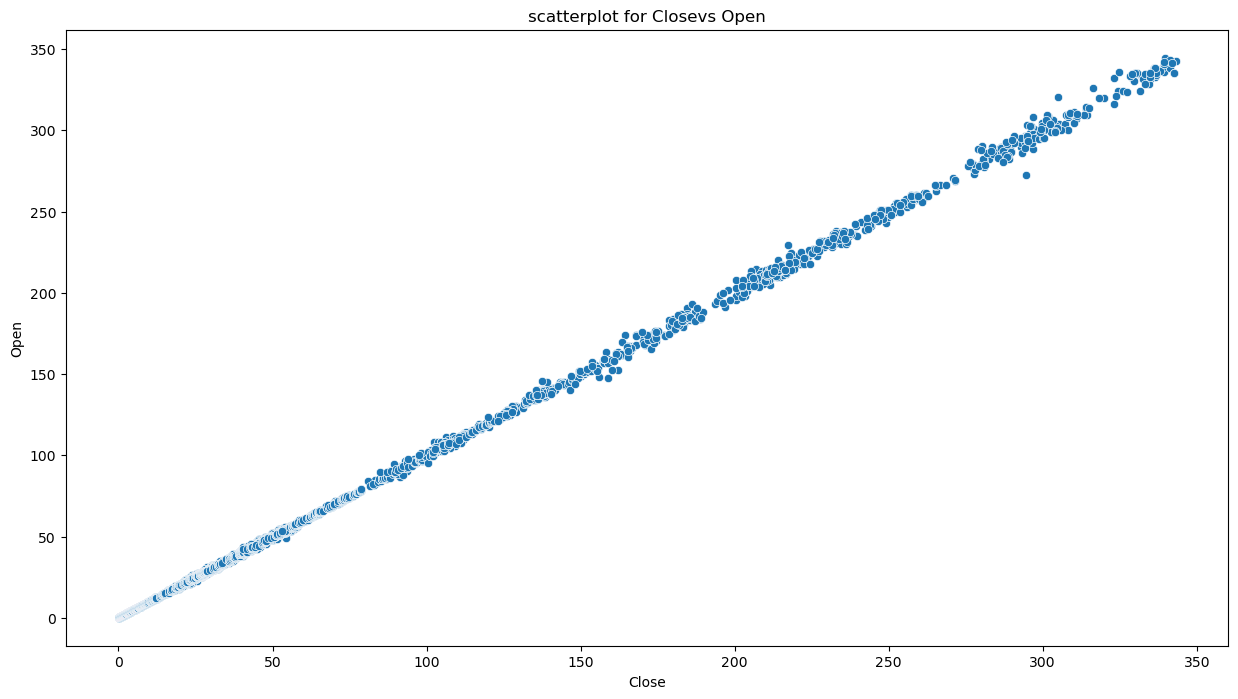

In [20]:
scatter('Close','Open')

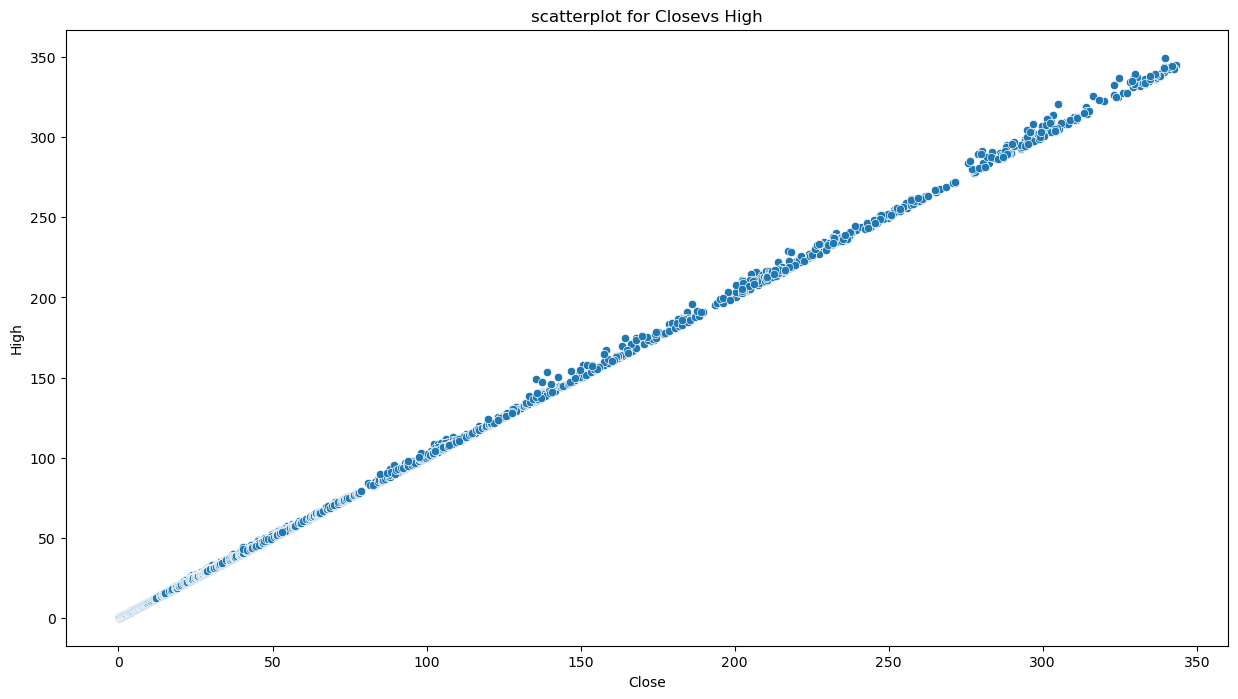

In [21]:
scatter('Close','High')

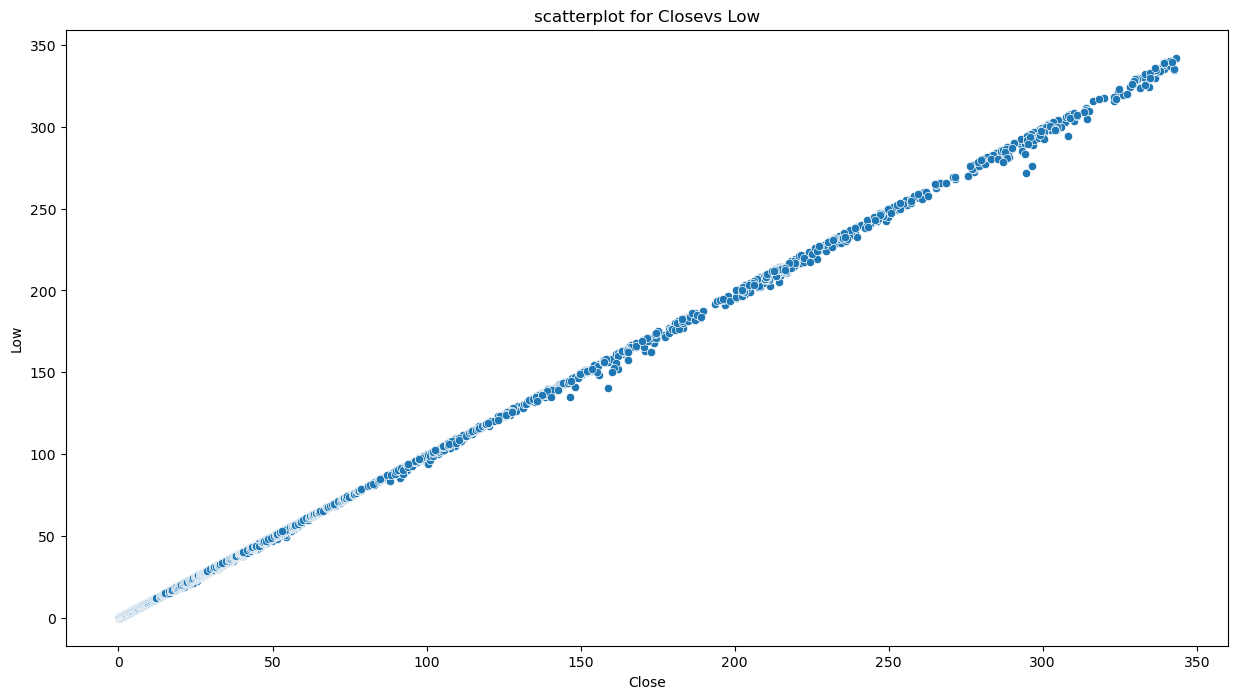

In [22]:
scatter('Close','Low')

In [23]:
# There is a linear relationship between the three variables ,so befor time series analysis ,Regression can come in handy

# REGRESSION ANALYSIS  AND MODEL FITTING

In [24]:
class Microsoft():
    def __init__(self,df,x,y):
        """Args:
        x :Independent variable
        y: Dependent variable
        df : dataframe under study
        Returns:
        """
        self.df = df
        self.x = x
        self.y =y
    def plot_stock(stock,color,date=df['Date'],df=df):
        fig = plt.figure(figsize=(20,8))
        sns.lineplot(y=df[stock],x=date,color=color)
        plt.title(f"Stock price change for |{stock}")
        plt.show()
    def scatter(a,b,df=df):
        plt.figure(figsize=(15,8))
        sns.scatterplot(x=a,y=b,data=df)
        plt.title(f"scatterplot for {a}vs {b}")

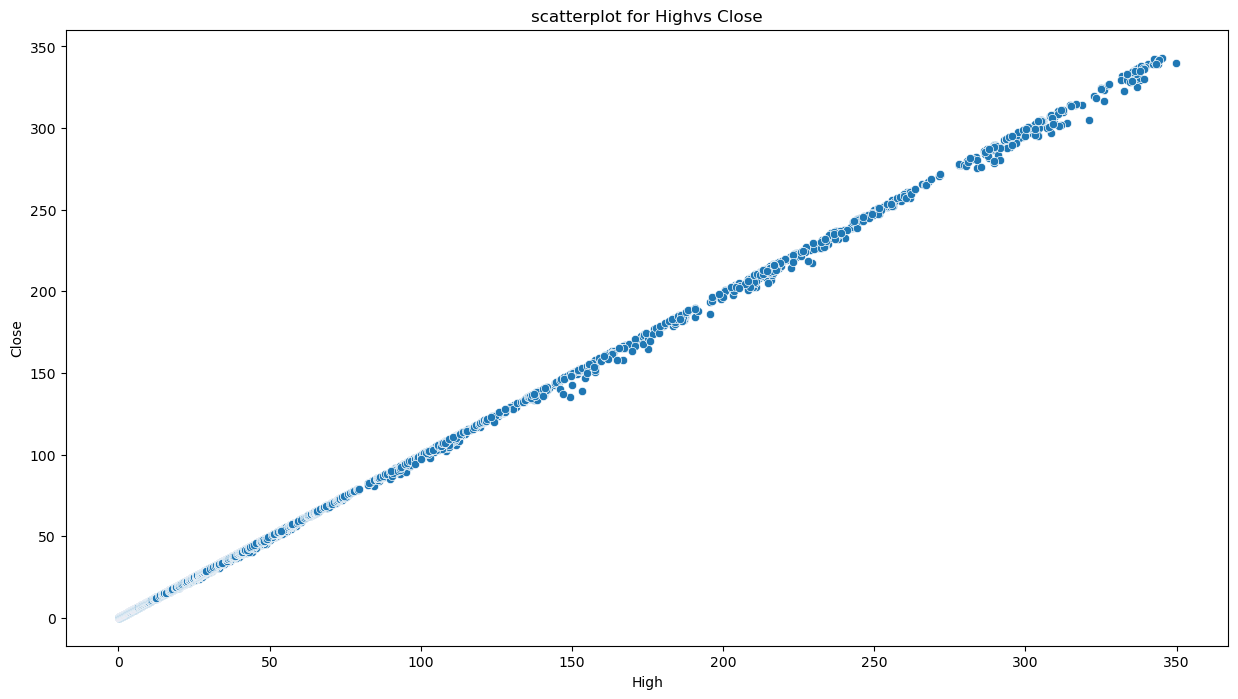

In [25]:
Microsoft.scatter('High','Close')

In [26]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

In [27]:
X = df.drop(['Close','Adj Close','Date'],axis=1)
y = df['Close']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_test)

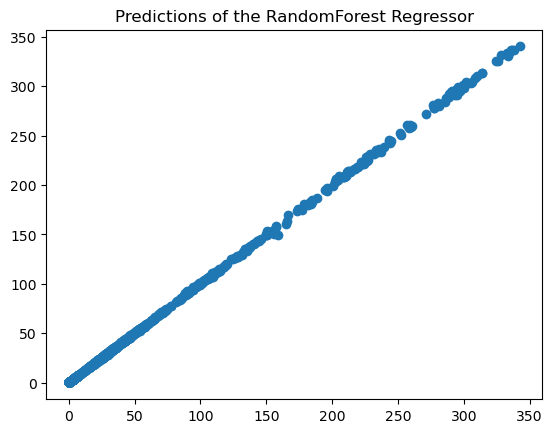

In [30]:
plt.scatter(y_test,rfr_predictions)
plt.title('Predictions of the RandomForest Regressor')
plt.show()

In [31]:
print(f"The mean squared error of random forest regressor is {mean_squared_error(y_test,rfr_predictions)}")
print(f"The mean absolute error of random forest regressor is {mean_absolute_error(y_test,rfr_predictions)}")

The mean squared error of random forest regressor is 0.4093591635431157
The mean absolute error of random forest regressor is 0.26848439194905266


In [32]:
from xgboost import XGBRegressor

In [33]:
X_reg = XGBRegressor()
X_reg.fit(X_train,y_train)
X_reg_pred = X_reg.predict(X_test)
print(X_reg_pred[:5])

[ 46.881203  28.004335   4.374523  25.814348 145.24457 ]


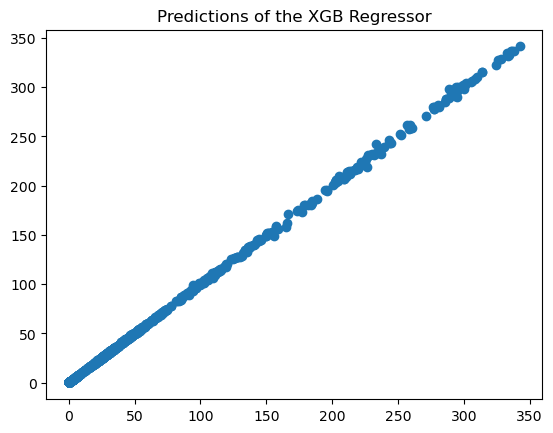

In [34]:
plt.scatter(y_test,X_reg_pred)
plt.title('Predictions of the XGB Regressor')
plt.show()

In [35]:
print(f"The mean squared error of XGboost regressor is {mean_squared_error(y_test,X_reg_pred)}")
print(f"The mean absolute error of XGboost regressor is {mean_absolute_error(y_test,X_reg_pred)}")

The mean squared error of XGboost regressor is 0.6549929102393307
The mean absolute error of XGboost regressor is 0.33994632452022305


In [36]:
X.values

array([[8.85420000e-02, 1.01563000e-01, 8.85420000e-02],
       [9.72220000e-02, 1.02431000e-01, 9.72220000e-02],
       [1.00694000e-01, 1.03299000e-01, 1.00694000e-01],
       ...,
       [2.99799988e+02, 3.05000000e+02, 2.98769989e+02],
       [3.00510010e+02, 3.03230011e+02, 2.97720001e+02],
       [2.99140015e+02, 3.04200012e+02, 2.98320007e+02]])

In [37]:
y.values

array([9.72220000e-02, 1.00694000e-01, 1.02431000e-01, ...,
       3.04059998e+02, 2.99489990e+02, 3.04100006e+02])

In [38]:
X.shape

(9083, 3)

In [39]:
X_lstm = X.values
X_lstm = torch.from_numpy(X_lstm).type(torch.float32)
y_lstm = y.values
y_lstm = torch.from_numpy(y_lstm).type(torch.float32)

In [40]:
X_lstm,y_lstm


(tensor([[8.8542e-02, 1.0156e-01, 8.8542e-02],
         [9.7222e-02, 1.0243e-01, 9.7222e-02],
         [1.0069e-01, 1.0330e-01, 1.0069e-01],
         ...,
         [2.9980e+02, 3.0500e+02, 2.9877e+02],
         [3.0051e+02, 3.0323e+02, 2.9772e+02],
         [2.9914e+02, 3.0420e+02, 2.9832e+02]]),
 tensor([9.7222e-02, 1.0069e-01, 1.0243e-01,  ..., 3.0406e+02, 2.9949e+02,
         3.0410e+02]))

In [41]:
X_lstm.shape

torch.Size([9083, 3])

In [42]:
class DeepLinear(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        super().__init__()
        self.linear_1 = nn.Linear(input_dim,hidden_dim)
        self.linear_2 = nn.Linear(hidden_dim,hidden_dim)
        self.out = nn.Linear(hidden_dim,output_dim)
    def forward(x:torch.Tensor):
        x = F.relu(self.linear_1(x))
        x = F.relu(self.linear_2(x))
        x = self.out(x)
        x = torch.sigmoid(x)
        return x
        

In [43]:
X_ltrain,X_ltest,y_ltrain,y_ltest = train_test_split(X_lstm,y_lstm,test_size=0.1,random_state = 42)

In [44]:
X_ltrain.shape,y_ltrain.shape

(torch.Size([8174, 3]), torch.Size([8174]))

In [45]:
deep_regressor = DeepLinear(input_dim=3,hidden_dim=9,output_dim=1)

# TIME SERIES ANALYSIS

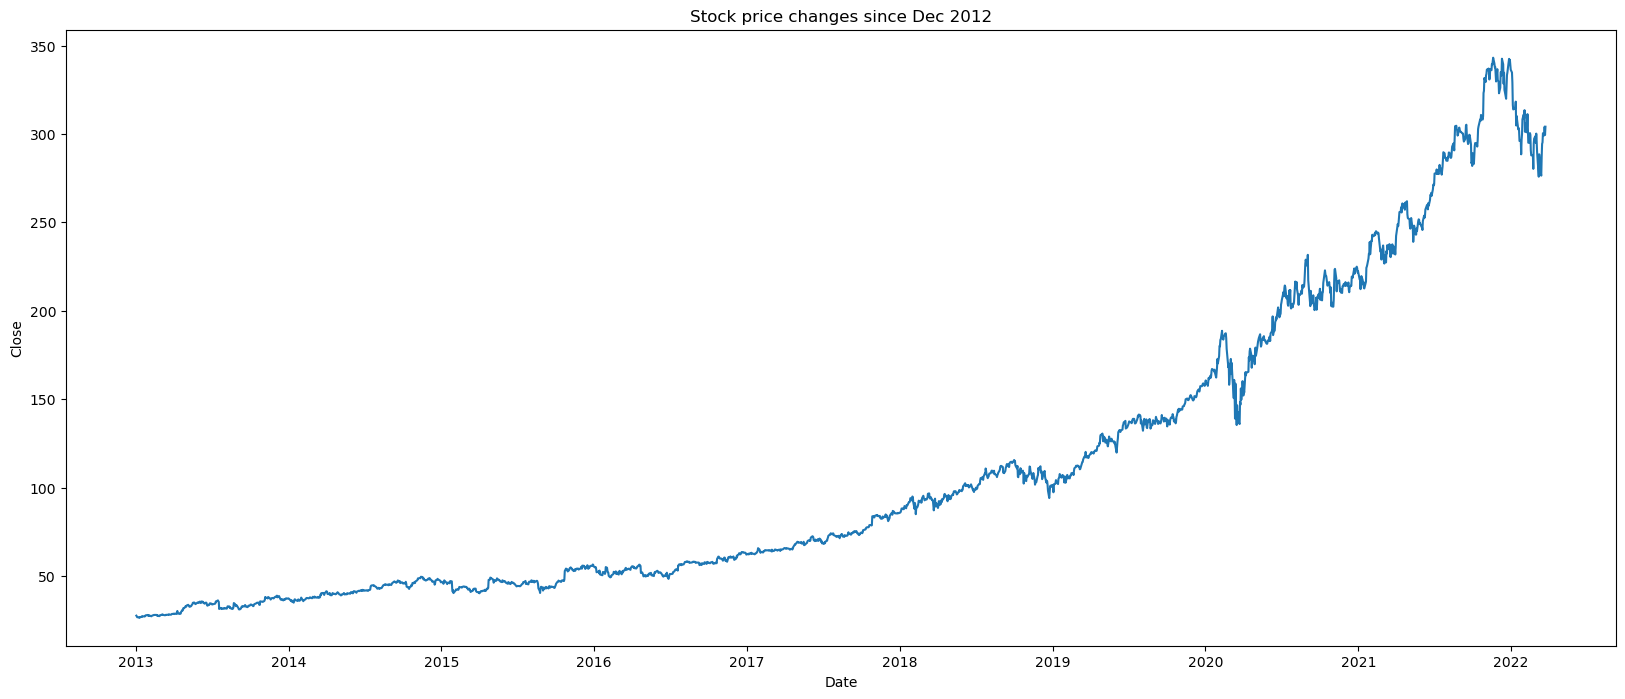

In [46]:
# Studying the last 10 years stock price
fig = plt.figure(figsize=(20,8))
sns.lineplot(x=df[df['Date']>'2012-12-31']['Date'],y=df[df['Date']>'2012-12-31']['Close'])
plt.title('Stock price changes since Dec 2012')
plt.show()
#2020 was really a bad year in the stock price market for all companies ,this can be attributed to the surge in covid cases

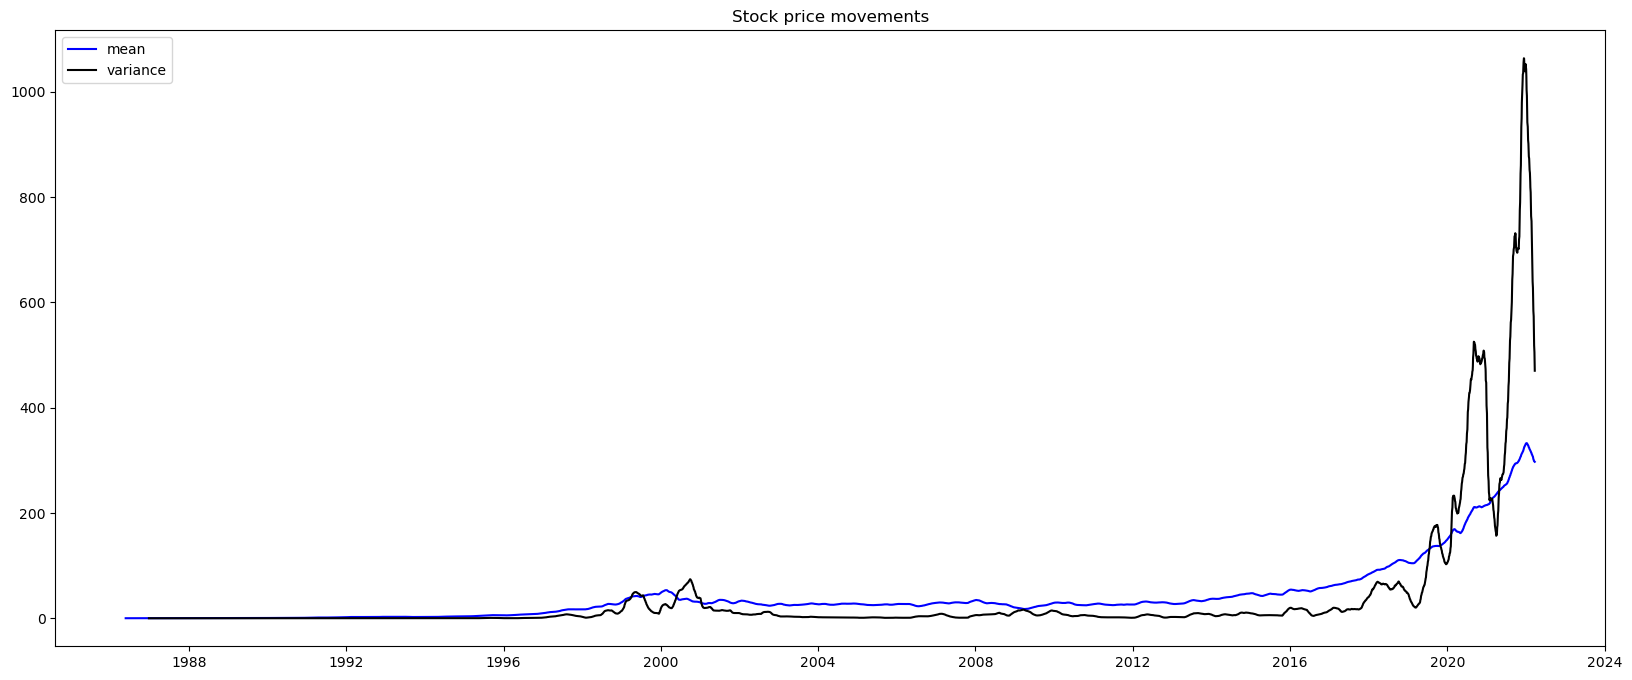

In [47]:
# Computing Moving averages since it is a highly volatile series
plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['Close'].rolling(50).mean(),color='blue',label='mean')
plt.plot(df['Date'],df['Close'].rolling(200).var(),color='black',label='variance')
plt.legend()
plt.title('Stock price movements')
plt.show()

In [48]:
#obtain the close and date and convert it to a time series before we test for stationarity
# This is clearly a Multiplicative Time series model ,and is stationary but its just my two cents
df_1 = df[['Date','Close']]

In [49]:
df_1

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9078,2022-03-18,300.429993
9079,2022-03-21,299.160004
9080,2022-03-22,304.059998
9081,2022-03-23,299.489990


In [50]:
# Converting it into a time series
ts_df = df_1.set_index('Date')

<Figure size 2000x800 with 0 Axes>

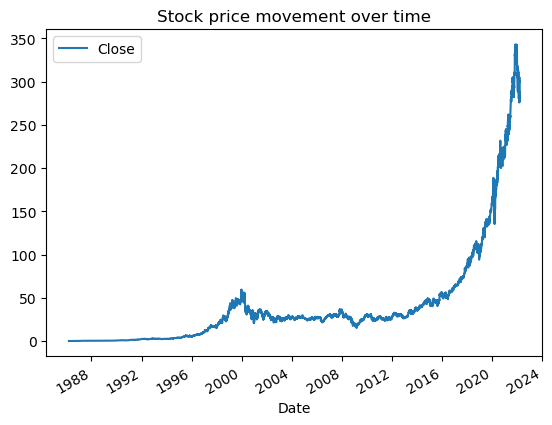

In [51]:
plt.figure(figsize=(20,8))
ts_df.plot()
plt.title('Stock price movement over time')
plt.show()

In [52]:
# Now that we have our time series,we can go ahead and perform ADF(Augumented Dickey Fuller test) stationarity test
type(df_1) , type(ts_df)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [53]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [54]:
def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print ('The results of Dickey Fuller test')
    print('=====================================')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags used','number of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key] = value
        print(dfoutput)

In [55]:
ts = ts_df['Close']

In [56]:
stationarity_test(ts)

The results of Dickey Fuller test
Test Statistic               5.344103
p-value                      1.000000
lags used                   38.000000
number of observations    9044.000000
Critical value(1%)          -3.431073
dtype: float64
Test Statistic               5.344103
p-value                      1.000000
lags used                   38.000000
number of observations    9044.000000
Critical value(1%)          -3.431073
Critical value(5%)          -2.861860
dtype: float64
Test Statistic               5.344103
p-value                      1.000000
lags used                   38.000000
number of observations    9044.000000
Critical value(1%)          -3.431073
Critical value(5%)          -2.861860
Critical value(10%)         -2.566940
dtype: float64


In [123]:
class LSTM(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim,num_layers):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.fc = nn.Linear(hidden_dim,output_dim)
        self.lstm = nn.LSTM(input_dim,output_dim,num_layers)
    def forward(self,x:torch.Tensor):
        h0 = torch.zeros(self.num_layers,x.size(0),self.hidden_dim).requires_grad()
        c0 = torch.zeros(self.num_layers,x.size(0),self.hidden_dim).requires_grad()
        out,(hn,cn) = self.lstm(x,(h0.detach(),c0.detach()))
        out = self.fc(out[:,-1,:])
        return out
        
        

In [124]:
ts_df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-03-18,300.429993
2022-03-21,299.160004
2022-03-22,304.059998


In [125]:
close_df = ts_df[['Close']]

In [126]:
close_df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-03-18,300.429993
2022-03-21,299.160004
2022-03-22,304.059998


In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
price = close_df[['Close']]
price = scaler.fit_transform(price.values.reshape(-1,1))

In [128]:
price

array([[-0.99995951],
       [-0.99993927],
       [-0.99992914],
       ...,
       [ 0.77231636],
       [ 0.74567062],
       [ 0.77254963]])

In [129]:
# Using the sliding window method
def split_data(stock,lookback):
    data_raw = stock
    data= []
    #We will create all sequences of lenght
    for index in range(len(data_raw)-lookback):
        data.append(data_raw[index:index+lookback])
        data=np.array(data);
        test_set_size = int(np.round(0.2*data.shape[0]));
        train_set_size = int(np.round(data.shape[0]-(test_set_size)));
        x_train = data[:train_set_size,:-1,:]
        y_train = data[:train_set_size,:-1,:]
        x_test = data[train_set_size:,:-1]
        y_test = data[train_set_size:,:-1]
        return [x_train,y_train,x_test,y_test]

In [130]:
def split_data(stock,lookback):
    data_raw = stock
    data = []
    for index in range(len(data_raw)-lookback):
        data.append(data_raw[index:index+lookback])
        data = np.array(data)
        test_size = int(np.round(0.2*data.shape[0]))
        train_size = int(np.round(data.shape[0])-(test_size))
        x_train = data[:train_size,:-1,:]
        y_train = data[:train_size,:-1,:]
        x_test = data[test_size:,-1,:]
        y_test = data [ test_size:,:-1]
        
        return [x_train,y_train,x_test,y_test]

In [131]:
lookback = 20
x_train,y_train,x_test,y_test = split_data(price,lookback)

In [132]:
type(x_train)

numpy.ndarray

In [102]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_test).type(torch.Tensor)

In [103]:
type(x_train)

torch.Tensor

In [133]:
input_dim = 1
hidden_dim = 32
output_dim = 1
num_layers = 2

In [134]:
model = LSTM(input_dim= input_dim,hidden_dim = hidden_dim,output_dim=output_dim,num_layers=num_layers)
model.parameters()

<generator object Module.parameters at 0x000001A529ECA2E0>

In [135]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01)


In [136]:
# Training and testing loop
epochs  = 100
for epoch in range(epochs):
    model.train()
    y_pred = model(x_train)
    loss = criterion(y_test,y_pred)
    with torch.inference_mode():
        model.eval()
        y_pred = model(x_test)
        test_loss = criterion(y_test,y_pred)
        if epoch% 10 == 0:
            print(f"Epoch:{epoch} and the loss is {loss}")
            print(f"Epoch:{epoch} and the test_loss is {test_loss}")

TypeError: 'int' object is not callable